In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.compose import ColumnTransformer
import scipy
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
df = pd.read_csv('dialogues_text.csv', encoding = 'utf-8')
df

,Dialogue,Topic
0,The kitchen stinks . __eou__ I'll throw out th...,1
1,"So Dick , how about getting some coffee for to...",1
2,Are things still going badly with your housegu...,1
3,Would you mind waiting a while ? __eou__ Well ...,1
4,Are you going to the annual party ? I can give...,1
...,...,...
13113,You have done an excellent job this year and w...,10
13114,Lindsay Tipping gave me your name as a referen...,10
13115,The consignments of chemical instruments have ...,10
13116,good morning . How can I help you ? __eou__ I'...,10


In [3]:
d_list = []
for dialogue in df['Dialogue'].values:

    x=dialogue.split('__eou__')[:-1]

    d_list.append(x)

In [4]:
df['Length'] = [len(x) for x in d_list]
df

,Dialogue,Topic,Length
0,The kitchen stinks . __eou__ I'll throw out th...,1,2
1,"So Dick , how about getting some coffee for to...",1,5
2,Are things still going badly with your housegu...,1,4
3,Would you mind waiting a while ? __eou__ Well ...,1,4
4,Are you going to the annual party ? I can give...,1,3
...,...,...,...
13113,You have done an excellent job this year and w...,10,8
13114,Lindsay Tipping gave me your name as a referen...,10,6
13115,The consignments of chemical instruments have ...,10,9
13116,good morning . How can I help you ? __eou__ I'...,10,17


In [5]:
def remove_eou(x):
    x = x.replace('__eou__', '')
    return x   
df['Dialogue'] = df['Dialogue'].apply(remove_eou)
df

,Dialogue,Topic,Length
0,The kitchen stinks . I'll throw out the garba...,1,2
1,"So Dick , how about getting some coffee for to...",1,5
2,Are things still going badly with your housegu...,1,4
3,"Would you mind waiting a while ? Well , how l...",1,4
4,Are you going to the annual party ? I can give...,1,3
...,...,...,...
13113,You have done an excellent job this year and w...,10,8
13114,Lindsay Tipping gave me your name as a referen...,10,6
13115,The consignments of chemical instruments have ...,10,9
13116,good morning . How can I help you ? I'd like ...,10,17


In [6]:
df['Topic'].replace({1:'OrdinaryLife', 2:'SchoolLife', 3:'Culture&Education', 4:'Attitude&Emotion', 5:'Relationship', 
                     6:'Tourism', 7:'Health', 8:'Work', 9:'Politics', 10:'Finance'}, inplace=True)
df

,Dialogue,Topic,Length
0,The kitchen stinks . I'll throw out the garba...,OrdinaryLife,2
1,"So Dick , how about getting some coffee for to...",OrdinaryLife,5
2,Are things still going badly with your housegu...,OrdinaryLife,4
3,"Would you mind waiting a while ? Well , how l...",OrdinaryLife,4
4,Are you going to the annual party ? I can give...,OrdinaryLife,3
...,...,...,...
13113,You have done an excellent job this year and w...,Finance,8
13114,Lindsay Tipping gave me your name as a referen...,Finance,6
13115,The consignments of chemical instruments have ...,Finance,9
13116,good morning . How can I help you ? I'd like ...,Finance,17


## Topic Counts ##

Topic
Attitude&Emotion      667
Culture&Education      55
Finance               485
Health                267
OrdinaryLife         3646
Politics              131
Relationship         4391
SchoolLife            487
Tourism              1065
Work                 1924
Name: Dialogue, dtype: int64


<AxesSubplot:xlabel='Topic'>

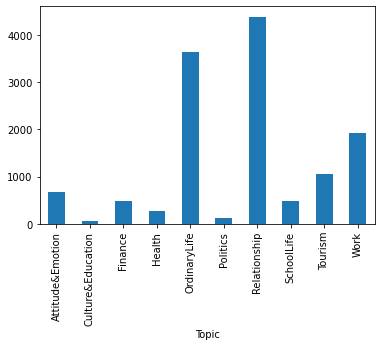

In [7]:
print(df.groupby('Topic')['Dialogue'].agg('count'))
df.groupby('Topic')['Dialogue'].agg('count').plot(kind='bar')

In [8]:
df.groupby('Length')['Dialogue'].agg('count')

Length
2      565
3      453
4     2302
5     1113
6     1417
7      941
8     1253
9      854
10    1159
11     525
12    1147
13     325
14     321
15     183
16     188
17     108
18      70
19      42
20      52
21      31
22      14
23      14
24      11
25       4
26       9
27       1
28       4
29       5
30       2
31       2
32       2
35       1
Name: Dialogue, dtype: int64

In [9]:
df.groupby(['Topic','Length'], as_index = False).count().pivot('Topic', 'Length').fillna(0)

Dialogue                                                   \
Length                  2      3      4      5      6      7      8      9    
Topic                                                                         
Attitude&Emotion      76.0   43.0  170.0   51.0   63.0   49.0   43.0   34.0   
Culture&Education      0.0    0.0    2.0    3.0    5.0    5.0    6.0    2.0   
Finance                0.0    2.0   21.0   45.0   74.0   62.0   69.0   33.0   
Health                 0.0    6.0   14.0    9.0   17.0   18.0   22.0   17.0   
OrdinaryLife         124.0   80.0  488.0  342.0  398.0  279.0  365.0  252.0   
Politics               1.0    0.0    2.0    1.0    0.0    5.0    6.0    2.0   
Relationship         303.0  229.0  930.0  352.0  438.0  276.0  356.0  297.0   
SchoolLife            12.0   11.0   49.0   18.0   41.0   22.0   67.0   33.0   
Tourism                9.0   26.0  139.0  153.0  158.0   93.0  120.0   62.0   
Work                  40.0   56.0  487.0  139.0  223.0  132.0  199.0  122.0   

                                 ...                                          \
Length                10     11  ...   24   25   26   27   28   29   30   31   
Topic                            ...                                           
Attitude&Emotion    47.0   19.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
Culture&Education    3.0    3.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
Finance             53.0   22.0  ...  2.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0   
Health              83.0   19.0  ...  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0   
OrdinaryLife       323.0  170.0  ...  2.0  1.0  6.0  0.0  1.0  3.0  1.0  0.0   
Politics             4.0    3.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
Relationship       291.0  178.0  ...  3.0  2.0  0.0  1.0  1.0  1.0  0.0  0.0   
SchoolLife          63.0   20.0  ...  0.0  0.0  1.0  0.0  0.0  1.0  1.0  1.0   
Tourism             98.0   31.0  ...  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0   
Work               194.0   60.0  ...  3.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0   

                             
Length              32   35  
Topic                        
Attitude&Emotion   0.0  0.0  
Culture&Education  0.0  0.0  
Finance            0.0  0.0  
Health             0.0  0.0  
OrdinaryLife       0.0  1.0  
Politics           0.0  0.0  
Relationship       0.0  0.0  
SchoolLife         0.0  0.0  
Tourism            1.0  0.0  
Work               1.0  0.0  

[10 rows x 32 columns]

In [10]:
df[df['Topic'] == 'Politics'][df['Length'] == 4]

<ipython-input-10-4d624ae2817d>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df['Topic'] == 'Politics'][df['Length'] == 4]


,Dialogue,Topic,Length
12402,Freeze ! Police ! Put your hands over your hea...,Politics,4
12413,Please tell us the exact time when the big fir...,Politics,4


In [11]:
X = df['Dialogue'].values
y = df['Topic']
y

0        OrdinaryLife
1        OrdinaryLife
2        OrdinaryLife
3        OrdinaryLife
4        OrdinaryLife
             ...     
13113         Finance
13114         Finance
13115         Finance
13116         Finance
13117         Finance
Name: Topic, Length: 13118, dtype: object

In [12]:
y

0        OrdinaryLife
1        OrdinaryLife
2        OrdinaryLife
3        OrdinaryLife
4        OrdinaryLife
             ...     
13113         Finance
13114         Finance
13115         Finance
13116         Finance
13117         Finance
Name: Topic, Length: 13118, dtype: object

## CountVectorizer - Different N-gram ranges

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 3)

vectorizer = CountVectorizer(ngram_range = (1,1))
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

lr_model = LogisticRegression(random_state = 3, solver='saga')
lr_model.fit(X_train, y_train)
y_hat_lr = lr_model.predict(X_test)

accuracy_score_lr = metrics.accuracy_score(y_test, y_hat_lr)


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


In [14]:
print('Accuracy = ' + str(accuracy_score_lr))
print(metrics.classification_report(y_test, y_hat_lr))

Accuracy = 0.6783536585365854
                   precision    recall  f1-score   support

 Attitude&Emotion       0.23      0.11      0.15       133
Culture&Education       0.14      0.12      0.13         8
          Finance       0.71      0.55      0.62       100
           Health       0.70      0.61      0.65        51
     OrdinaryLife       0.70      0.71      0.71       729
         Politics       0.56      0.50      0.53        18
     Relationship       0.68      0.78      0.73       889
       SchoolLife       0.68      0.50      0.58        90
          Tourism       0.71      0.65      0.68       213
             Work       0.68      0.69      0.69       393

         accuracy                           0.68      2624
        macro avg       0.58      0.52      0.55      2624
     weighted avg       0.67      0.68      0.67      2624



In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 3)
vectorizer = CountVectorizer(ngram_range = (1,2))
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

lr_model = LogisticRegression(random_state = 3, solver='saga')
lr_model.fit(X_train, y_train)
y_hat_lr = lr_model.predict(X_test)

accuracy_score_lr = metrics.accuracy_score(y_test, y_hat_lr)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


In [16]:
print('Accuracy = ' + str(accuracy_score_lr))
print(metrics.classification_report(y_test, y_hat_lr))

Accuracy = 0.6871189024390244
                   precision    recall  f1-score   support

 Attitude&Emotion       0.29      0.18      0.22       133
Culture&Education       0.25      0.25      0.25         8
          Finance       0.79      0.57      0.66       100
           Health       0.73      0.59      0.65        51
     OrdinaryLife       0.71      0.72      0.71       729
         Politics       0.69      0.50      0.58        18
     Relationship       0.68      0.79      0.73       889
       SchoolLife       0.67      0.47      0.55        90
          Tourism       0.75      0.64      0.69       213
             Work       0.72      0.71      0.72       393

         accuracy                           0.69      2624
        macro avg       0.63      0.54      0.58      2624
     weighted avg       0.68      0.69      0.68      2624



In [17]:
cm = confusion_matrix(y_test, y_hat_lr)

cm_df = pd.DataFrame(confusion_matrix(y_test, y_hat_lr), 
                                columns = ['Attitude&Emotion','Culture&Education','Finance', 'Health', 'OrdinaryLife', 'Politics', 'Relationship', 'SchoolLife', 'Tourism', 'Work'],
                    index =['Attitude&Emotion','Culture&Education','Finance', 'Health', 'OrdinaryLife', 'Politics', 'Relationship', 'SchoolLife', 'Tourism', 'Work'] )

cm_df

,Attitude&Emotion,Culture&Education,Finance,Health,OrdinaryLife,Politics,Relationship,SchoolLife,Tourism,Work
Attitude&Emotion,24,1,1,2,29,0,67,2,1,6
Culture&Education,1,2,0,0,0,0,5,0,0,0
Finance,1,0,57,0,13,0,6,0,1,22
Health,0,0,0,30,12,0,7,0,1,1
OrdinaryLife,12,1,5,4,524,2,135,6,24,16
Politics,0,0,0,0,4,9,5,0,0,0
Relationship,28,3,3,4,83,2,699,8,14,45
SchoolLife,2,0,0,0,13,0,24,42,1,8
Tourism,2,0,0,0,38,0,26,1,137,9
Work,13,1,6,1,25,0,60,4,4,279


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 3)
vectorizer = CountVectorizer(ngram_range = (1,3))
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

lr_model = LogisticRegression(random_state = 3, solver='saga')
lr_model.fit(X_train, y_train)
y_hat_lr = lr_model.predict(X_test)

accuracy_score_lr = metrics.accuracy_score(y_test, y_hat_lr)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


In [19]:
print('Accuracy = ' + str(accuracy_score_lr))
print(metrics.classification_report(y_test, y_hat_lr))

Accuracy = 0.6852134146341463
                   precision    recall  f1-score   support

 Attitude&Emotion       0.27      0.15      0.19       133
Culture&Education       0.25      0.25      0.25         8
          Finance       0.82      0.53      0.64       100
           Health       0.79      0.59      0.67        51
     OrdinaryLife       0.70      0.72      0.71       729
         Politics       0.70      0.39      0.50        18
     Relationship       0.67      0.79      0.73       889
       SchoolLife       0.69      0.39      0.50        90
          Tourism       0.75      0.64      0.69       213
             Work       0.72      0.72      0.72       393

         accuracy                           0.69      2624
        macro avg       0.64      0.52      0.56      2624
     weighted avg       0.68      0.69      0.68      2624



### Length of Dialogue

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 3)


transformer = ColumnTransformer([('Dialogue', CountVectorizer(), 'Dialogue')], 
                                    remainder = 'passthrough')
transformed_data = transformer.fit_transform(df[['Dialogue', 'Length']])

In [21]:
transformed_data

<13118x18654 sparse matrix of type '<class 'numpy.int64'>'
	with 745784 stored elements in Compressed Sparse Row format>

In [22]:

lr_length_model = LogisticRegression(random_state = 3, solver = 'saga')
lr_length_scores = cross_val_score(lr_length_model, transformed_data, y, cv = 10)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which mean

In [23]:
lr_length_scores.mean()

0.6593978484121225

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 3)


transformer = ColumnTransformer([('Dialogue', TfidfVectorizer(), 'Dialogue')], 
                                    remainder = 'passthrough')
transformed_data = transformer.fit_transform(df[['Dialogue', 'Length']])

In [25]:
lr_length_model = LogisticRegression(random_state = 3, solver = 'saga')
lr_length_scores = cross_val_score(lr_length_model, transformed_data, y, cv = 10)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which mean

In [26]:
lr_length_scores.mean()

0.622808064036018

## TfidfVectorizer

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 3)

vectorizer = TfidfVectorizer(stop_words = 'english', ngram_range = (1,1))
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

lr_model = LogisticRegression(random_state = 3, solver='saga')
lr_model.fit(X_train, y_train)
y_hat_lr = lr_model.predict(X_test)

accuracy_score_lr = metrics.accuracy_score(y_test, y_hat_lr)

In [28]:
print('Accuracy = ' + str(accuracy_score_lr))
print(metrics.classification_report(y_test, y_hat_lr))

Accuracy = 0.6966463414634146
                   precision    recall  f1-score   support

 Attitude&Emotion       0.22      0.02      0.03       133
Culture&Education       0.00      0.00      0.00         8
          Finance       0.91      0.52      0.66       100
           Health       0.74      0.49      0.59        51
     OrdinaryLife       0.71      0.75      0.73       729
         Politics       1.00      0.33      0.50        18
     Relationship       0.65      0.85      0.73       889
       SchoolLife       0.80      0.39      0.52        90
          Tourism       0.84      0.60      0.70       213
             Work       0.73      0.71      0.72       393

         accuracy                           0.70      2624
        macro avg       0.66      0.47      0.52      2624
     weighted avg       0.69      0.70      0.68      2624



/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [29]:
cm2 = confusion_matrix(y_test, y_hat_lr)

cm_df2 = pd.DataFrame(confusion_matrix(y_test, y_hat_lr), 
                                columns = ['Attitude&Emotion','Culture&Education','Finance', 'Health', 'OrdinaryLife', 'Politics', 'Relationship', 'SchoolLife', 'Tourism', 'Work'],
                    index =['Attitude&Emotion','Culture&Education','Finance', 'Health', 'OrdinaryLife', 'Politics', 'Relationship', 'SchoolLife', 'Tourism', 'Work'] )

cm_df2

,Attitude&Emotion,Culture&Education,Finance,Health,OrdinaryLife,Politics,Relationship,SchoolLife,Tourism,Work
Attitude&Emotion,2,0,0,0,27,0,98,2,0,4
Culture&Education,0,0,0,0,0,0,7,0,0,1
Finance,0,0,52,0,17,0,5,0,1,25
Health,0,0,0,25,9,0,15,0,0,2
OrdinaryLife,3,0,2,4,547,0,142,2,11,18
Politics,0,0,0,0,4,6,7,0,1,0
Relationship,3,0,0,3,86,0,754,2,5,36
SchoolLife,0,0,0,0,16,0,28,35,2,9
Tourism,0,0,0,0,41,0,36,0,128,8
Work,1,0,3,2,25,0,75,3,5,279


In [30]:
lr_xval_scores = cross_val_score(lr_model, X_train, y_train, cv=10)

In [31]:
lr_xval_scores.mean()

0.6804857233646556

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 3)

vectorizer = TfidfVectorizer(ngram_range = (1,3))
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

lr_model = LogisticRegression(random_state = 3, solver='saga')
lr_model.fit(X_train, y_train)
y_hat_lr = lr_model.predict(X_test)

accuracy_score_lr = metrics.accuracy_score(y_test, y_hat_lr)

In [33]:
print(accuracy_score_lr)
print(metrics.classification_report(y_test, y_hat_lr))

0.6814024390243902
                   precision    recall  f1-score   support

 Attitude&Emotion       1.00      0.02      0.03       133
Culture&Education       0.00      0.00      0.00         8
          Finance       0.96      0.47      0.63       100
           Health       1.00      0.20      0.33        51
     OrdinaryLife       0.67      0.76      0.71       729
         Politics       0.00      0.00      0.00        18
     Relationship       0.64      0.88      0.74       889
       SchoolLife       1.00      0.12      0.22        90
          Tourism       0.88      0.53      0.66       213
             Work       0.73      0.69      0.71       393

         accuracy                           0.68      2624
        macro avg       0.69      0.37      0.40      2624
     weighted avg       0.72      0.68      0.65      2624



/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Naive Bayes

In [36]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB, CategoricalNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/opt/anaconda3/lib/python3.8/site-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['cm']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [38]:
df = pd.read_csv('dialogues_text.csv', encoding = 'utf-8')
df

,Dialogue,Topic
0,The kitchen stinks . __eou__ I'll throw out th...,1
1,"So Dick , how about getting some coffee for to...",1
2,Are things still going badly with your housegu...,1
3,Would you mind waiting a while ? __eou__ Well ...,1
4,Are you going to the annual party ? I can give...,1
...,...,...
13113,You have done an excellent job this year and w...,10
13114,Lindsay Tipping gave me your name as a referen...,10
13115,The consignments of chemical instruments have ...,10
13116,good morning . How can I help you ? __eou__ I'...,10


In [39]:
def remove_eou(x):
    x = x.replace('__eou__', '')
    return x   
df['Dialogue'] = df['Dialogue'].apply(remove_eou)
df

,Dialogue,Topic
0,The kitchen stinks . I'll throw out the garba...,1
1,"So Dick , how about getting some coffee for to...",1
2,Are things still going badly with your housegu...,1
3,"Would you mind waiting a while ? Well , how l...",1
4,Are you going to the annual party ? I can give...,1
...,...,...
13113,You have done an excellent job this year and w...,10
13114,Lindsay Tipping gave me your name as a referen...,10
13115,The consignments of chemical instruments have ...,10
13116,good morning . How can I help you ? I'd like ...,10


In [40]:
df['Topic'].replace({1:'OrdinaryLife', 2:'SchoolLife', 3:'Culture&Education', 4:'Attitude&Emotion', 5:'Relationship', 
                     6:'Tourism', 7:'Health', 8:'Work', 9:'Politics', 10:'Finance'}, inplace=True)


Topic
Attitude&Emotion      667
Culture&Education      55
Finance               485
Health                267
OrdinaryLife         3646
Politics              131
Relationship         4391
SchoolLife            487
Tourism              1065
Work                 1924
Name: Dialogue, dtype: int64


<AxesSubplot:xlabel='Topic'>

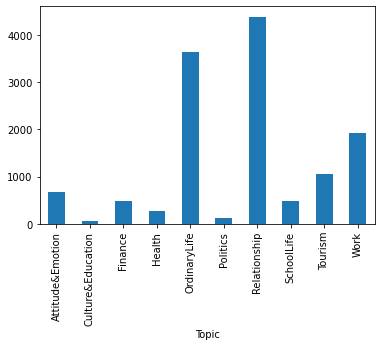

In [41]:
print(df.groupby('Topic')['Dialogue'].agg('count'))
df.groupby('Topic')['Dialogue'].agg('count').plot(kind='bar')

In [42]:
X = df['Dialogue'].values
y = df['Topic']
y

0        OrdinaryLife
1        OrdinaryLife
2        OrdinaryLife
3        OrdinaryLife
4        OrdinaryLife
             ...     
13113         Finance
13114         Finance
13115         Finance
13116         Finance
13117         Finance
Name: Topic, Length: 13118, dtype: object

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 3)

vectorizer = CountVectorizer(stop_words = "english", ngram_range = (1,2))
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)
X = vectorizer.fit_transform(X)

In [44]:
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
y_hat_nb = nb_model.predict(X_test)

accuracy_score_nb = metrics.accuracy_score(y_test, y_hat_nb)

print("nb_model accuracy is : ", accuracy_score_nb)
print("classification report:\n", metrics.classification_report(y_test, y_hat_nb))

nb_model accuracy is :  0.666920731707317
classification report:
                    precision    recall  f1-score   support

 Attitude&Emotion       0.45      0.04      0.07       133
Culture&Education       0.00      0.00      0.00         8
          Finance       0.91      0.42      0.58       100
           Health       0.94      0.29      0.45        51
     OrdinaryLife       0.67      0.76      0.71       729
         Politics       0.00      0.00      0.00        18
     Relationship       0.62      0.84      0.72       889
       SchoolLife       0.73      0.18      0.29        90
          Tourism       0.91      0.45      0.60       213
             Work       0.72      0.69      0.70       393

         accuracy                           0.67      2624
        macro avg       0.59      0.37      0.41      2624
     weighted avg       0.68      0.67      0.64      2624



/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [45]:
# Confusion Matrix
cm_df = pd.DataFrame(metrics.confusion_matrix(y_test, y_hat_nb), 
                                columns = ['Attitude&Emotion','Culture&Education','Finance', 'Health', 'OrdinaryLife', 'Politics', 'Relationship', 'SchoolLife', 'Tourism', 'Work'],
                    index =['Attitude&Emotion','Culture&Education','Finance', 'Health', 'OrdinaryLife', 'Politics', 'Relationship', 'SchoolLife', 'Tourism', 'Work'] )

cm_df


,Attitude&Emotion,Culture&Education,Finance,Health,OrdinaryLife,Politics,Relationship,SchoolLife,Tourism,Work
Attitude&Emotion,5,0,0,1,28,0,93,0,0,6
Culture&Education,0,0,0,0,0,0,7,1,0,0
Finance,0,0,42,0,22,0,7,0,0,29
Health,0,0,0,15,13,0,19,0,0,4
OrdinaryLife,1,0,2,0,554,1,150,1,2,18
Politics,0,0,0,0,4,0,13,0,1,0
Relationship,4,0,1,0,91,1,751,3,4,34
SchoolLife,1,0,0,0,20,0,43,16,0,10
Tourism,0,0,0,0,70,0,39,1,96,7
Work,0,0,1,0,30,0,89,0,2,271


In [46]:
# Cross Validation
nb_xval_model = MultinomialNB()
nb_xval_scores = cross_val_score(nb_xval_model, X, y, cv=15)
nb_xval_scores.mean()

0.6702917293233083

## Word Embeddings

In [47]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [48]:
df = pd.read_csv('dialogues_text.csv', encoding = 'utf-8')
df

,Dialogue,Topic
0,The kitchen stinks . __eou__ I'll throw out th...,1
1,"So Dick , how about getting some coffee for to...",1
2,Are things still going badly with your housegu...,1
3,Would you mind waiting a while ? __eou__ Well ...,1
4,Are you going to the annual party ? I can give...,1
...,...,...
13113,You have done an excellent job this year and w...,10
13114,Lindsay Tipping gave me your name as a referen...,10
13115,The consignments of chemical instruments have ...,10
13116,good morning . How can I help you ? __eou__ I'...,10


In [49]:
def remove_eou(x):
    x = x.replace('__eou__', '')
    return x   
df['Dialogue'] = df['Dialogue'].apply(remove_eou)
df['Topic'] = df['Topic'].apply(lambda x: x-1)

Topic
0    3646
1     487
2      55
3     667
4    4391
5    1065
6     267
7    1924
8     131
9     485
Name: Dialogue, dtype: int64


<AxesSubplot:xlabel='Topic'>

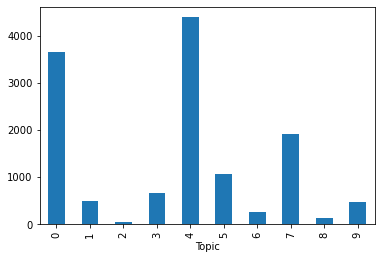

In [50]:
print(df.groupby('Topic')['Dialogue'].agg('count'))
df.groupby('Topic')['Dialogue'].agg('count').plot(kind='bar')

In [51]:
df.groupby('Topic')['Dialogue'].agg('count').min()

55

In [52]:
X = df['Dialogue'].values
y = df['Topic']
y

0        0
1        0
2        0
3        0
4        0
        ..
13113    9
13114    9
13115    9
13116    9
13117    9
Name: Topic, Length: 13118, dtype: int64

In [53]:
df

,Dialogue,Topic
0,The kitchen stinks . I'll throw out the garba...,0
1,"So Dick , how about getting some coffee for to...",0
2,Are things still going badly with your housegu...,0
3,"Would you mind waiting a while ? Well , how l...",0
4,Are you going to the annual party ? I can give...,0
...,...,...
13113,You have done an excellent job this year and w...,9
13114,Lindsay Tipping gave me your name as a referen...,9
13115,The consignments of chemical instruments have ...,9
13116,good morning . How can I help you ? I'd like ...,9


In [54]:
# import nltk
# nltk.download('stopwords')

In [55]:
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords


dialogues = df["Dialogue"].values.tolist()

tokenized_dialogues = []

for dialogue in dialogues:
    tokens = word_tokenize(dialogue)
    tokens = [word.lower() for word in tokens]
    table = str.maketrans('', '', string.punctuation)
    stripped = [word.translate(table) for word in tokens]
    words = [word for word in stripped if word.isalpha()]
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if not word in stop_words]
    tokenized_dialogues.append(words)

In [56]:
len(tokenized_dialogues)

13118

In [57]:
max_length = max([len(s.split()) for s in dialogues])

In [58]:
from gensim.models import Word2Vec

model = Word2Vec(tokenized_dialogues, min_count=1, sg=1)
words = list(model.wv.key_to_index)
print(model)
print("Vocabulary size: %d" % len(words))

/opt/anaconda3/lib/python3.8/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


Word2Vec(vocab=21424, vector_size=100, alpha=0.025)
Vocabulary size: 21424


In [59]:
model.wv['kitchen']

array([-0.10917552,  0.18180531,  0.34317592,  0.11692126, -0.2890448 ,
       -0.09705162,  0.17258644,  0.8168839 ,  0.0802095 , -0.08478609,
       -0.3072673 , -0.81777173, -0.42393062,  0.21027903, -0.2552295 ,
        0.02447787, -0.04105969,  0.16534019,  0.10511388, -0.49263862,
        0.7073876 , -0.27335906, -0.16539656,  0.0259364 , -0.12006025,
        0.19010939, -0.35281196, -0.15255687, -0.05439506,  0.380232  ,
        0.21542764, -0.10826027,  0.34556293,  0.14123783, -0.38532528,
        0.7155278 ,  0.05972655, -0.01899205, -0.20698303, -0.0860732 ,
        0.26392   , -0.6078172 , -0.41807282,  0.04202702,  0.15104373,
       -0.26119763, -0.2779257 , -0.30398086, -0.02000715, -0.41856688,
        0.3709851 , -0.22741774, -0.18390587, -0.2831723 , -0.10971504,
        0.16137514,  0.42031252, -0.26000077, -0.04597533,  0.33815736,
       -0.34104714, -0.22532696,  0.13114405,  0.3191139 , -0.24966986,
        0.335826  ,  0.30747753,  0.08457753, -0.5147607 ,  0.54

In [60]:
# test model
model.wv.most_similar("upset")

[('sad', 0.9373311996459961),
 ('depressed', 0.932994544506073),
 ('unhappy', 0.929395318031311),
 ('boyfriend', 0.9209082126617432),
 ('mad', 0.9065216779708862),
 ('awful', 0.8997370004653931),
 ('ill', 0.8997269868850708),
 ('surprised', 0.8977682590484619),
 ('dumped', 0.896877110004425),
 ('badly', 0.8965039253234863)]

In [61]:
model.wv.save_word2vec_format('embeddings.txt', binary=False)

In [62]:
embeddings_index = {}

with open("embeddings.txt") as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:])
        embeddings_index[word] = coefs

In [63]:
#pip install tensorflow

In [64]:
from tensorflow.python.keras.preprocessing.text import Tokenizer
from tensorflow.python.keras.preprocessing.sequence import pad_sequences
tokenizer_obj = Tokenizer()
tokenizer_obj.fit_on_texts(tokenized_dialogues)
sequences = tokenizer_obj.texts_to_sequences(tokenized_dialogues)

In [65]:
print(len(sequences))

13118


In [66]:
word_index = tokenizer_obj.word_index
print('Found %s unique tokens.' % len(word_index))

dialogue_pad = pad_sequences(sequences, maxlen=max_length)
topic = df['Topic'].values

print('Shape of dialogue tensor:', dialogue_pad.shape)
print('Shape of topic tensor:', topic.shape)

Found 21424 unique tokens.
Shape of dialogue tensor: (13118, 850)
Shape of topic tensor: (13118,)


In [67]:
topic = np.reshape(topic, (-1, 1))

In [68]:
num_words = len(word_index)+1
embedding_matrix = np.zeros((num_words, 100)) #Embedding dimention=100

for word, i in word_index.items():
    if i > num_words:
        continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [69]:
#pip install keras

In [70]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, GRU
from keras.layers.embeddings import Embedding
from keras.initializers import Constant
from keras.optimizers import SGD
from keras.losses import CategoricalCrossentropy
from keras.utils import to_categorical

In [71]:
model_keras = Sequential()
embedding_layer = Embedding(num_words, 
                            100, 
                            embeddings_initializer=Constant(embedding_matrix),
                            input_length = max_length,
                            trainable=False)
model_keras.add(embedding_layer)
model_keras.add(GRU(units=32, dropout=0.2, recurrent_dropout=0.2))
model_keras.add(Dense(10, activation='softmax'))
model_keras.compile(loss=CategoricalCrossentropy(), optimizer='adam', metrics=['accuracy'])

In [72]:
model_keras.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 850, 100)          2142500   
_________________________________________________________________
gru (GRU)                    (None, 32)                12864     
_________________________________________________________________
dense (Dense)                (None, 10)                330       
Total params: 2,155,694
Trainable params: 13,194
Non-trainable params: 2,142,500
_________________________________________________________________


In [73]:
VALIDATION_SPLIT = 0.2

indices = np.arange(dialogue_pad.shape[0])
np.random.shuffle(indices)
dialogue_pad = dialogue_pad[indices]
topic = topic[indices]
num_validation_samples = int(VALIDATION_SPLIT * dialogue_pad.shape[0])
X_train_pad = dialogue_pad[:-num_validation_samples]
y_train = to_categorical(topic[:-num_validation_samples])
X_test_pad = dialogue_pad[-num_validation_samples:]
y_test = to_categorical(topic[-num_validation_samples:])

In [74]:
print(y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [75]:
print('Shape of X_train_pad tensor:', X_train_pad.shape)
print('Shape of y_train tensor:', y_train.shape)

print('Shape of x_test_pad tensor:', X_test_pad.shape)
print('Shape of y_test tensor:', y_test.shape)

Shape of X_train_pad tensor: (10495, 850)
Shape of y_train tensor: (10495, 10)
Shape of x_test_pad tensor: (2623, 850)
Shape of y_test tensor: (2623, 10)


In [76]:
model_keras.fit(X_train_pad, y_train, batch_size=32, epochs=10, validation_data=(X_test_pad, y_test), verbose=2)

Epoch 1/10
328/328 - 191s - loss: 1.6356 - accuracy: 0.4265 - val_loss: 1.3606 - val_accuracy: 0.5376
Epoch 2/10
328/328 - 191s - loss: 1.3284 - accuracy: 0.5505 - val_loss: 1.2279 - val_accuracy: 0.5875
Epoch 3/10
328/328 - 183s - loss: 1.2546 - accuracy: 0.5797 - val_loss: 1.1696 - val_accuracy: 0.6039
Epoch 4/10
328/328 - 185s - loss: 1.2018 - accuracy: 0.5987 - val_loss: 1.1250 - val_accuracy: 0.6100
Epoch 5/10
328/328 - 216s - loss: 1.1553 - accuracy: 0.6068 - val_loss: 1.0769 - val_accuracy: 0.6256
Epoch 6/10
328/328 - 245s - loss: 1.1122 - accuracy: 0.6174 - val_loss: 1.0391 - val_accuracy: 0.6470
Epoch 7/10
328/328 - 239s - loss: 1.0744 - accuracy: 0.6298 - val_loss: 1.0208 - val_accuracy: 0.6374
Epoch 8/10
328/328 - 249s - loss: 1.0477 - accuracy: 0.6351 - val_loss: 0.9959 - val_accuracy: 0.6584
Epoch 9/10
328/328 - 215s - loss: 1.0255 - accuracy: 0.6407 - val_loss: 0.9874 - val_accuracy: 0.6527
Epoch 10/10
328/328 - 213s - loss: 1.0032 - accuracy: 0.6502 - val_loss: 0.9722 - 

In [77]:
loss, accuracy = model_keras.evaluate(X_test_pad, y_test, verbose=2)
print(loss, accuracy)

82/82 - 6s - loss: 0.9722 - accuracy: 0.6668
0.972160816192627 0.6667937636375427


In [78]:
y_pred = model_keras.predict(X_test_pad, batch_size=32, verbose=1)
y_hat = []
for i in y_pred:
    new_pred = [0]*10
    max_index = list(i).index(max(i))
    new_pred[max_index] = 1
    y_hat.append(new_pred)


82/82 [==============================] - 7s 76ms/step


In [79]:
from sklearn.metrics import classification_report
print("word embeddings model accuracy is : ", accuracy)
print(classification_report(y_test, y_hat))

word embeddings model accuracy is :  0.6667937636375427
              precision    recall  f1-score   support

           0       0.65      0.70      0.67       735
           1       0.52      0.36      0.42        84
           2       0.00      0.00      0.00         6
           3       0.50      0.01      0.02       122
           4       0.67      0.80      0.73       880
           5       0.64      0.59      0.61       219
           6       0.64      0.48      0.55        44
           7       0.73      0.69      0.71       410
           8       0.00      0.00      0.00        23
           9       0.73      0.66      0.69       100

   micro avg       0.67      0.67      0.67      2623
   macro avg       0.51      0.43      0.44      2623
weighted avg       0.65      0.67      0.64      2623
 samples avg       0.67      0.67      0.67      2623



/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
